## IMPORTING LIBRARIES

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
from tensorflow.keras.layers import (  
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten,
    BatchNormalization
)
from tensorflow.keras.models import Sequential 



## SPLIT DATA

In [12]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

## PREPROCESS DATA AND VISUALIZE DATA

In [13]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [14]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()

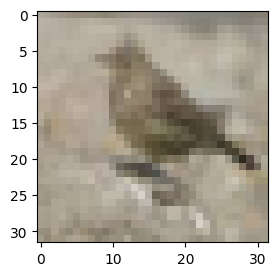

In [15]:
fig,axes = plt.subplots(1,1,figsize=(3,3))
axes.imshow(X_train[120]) 

## DEFINE THE MODEL

In [16]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 3),padding='same'),  # First convolutional layer
    Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding='same'),    # Second convolutional layer
    
    MaxPooling2D(pool_size=(2,2)),  # First max-pooling layer
    BatchNormalization(),   # Batch normalization
    ##Dropout(0.3),
    
    Conv2D(filters=128, kernel_size=(3,3), activation="relu",padding='same'),  # Third convolutional layer
    Conv2D(filters=128, kernel_size=(3,3), activation="relu",padding='same'),  # Fourth convolutional layer
    
    MaxPooling2D(pool_size=(2,2)),  # Second max-pooling layer
    BatchNormalization(),           # Batch normalization
    ##Dropout(0.4),
    
    Conv2D(filters=256, kernel_size=(3,3), activation="relu",padding='same'),  # Fifth convolutional layer
    MaxPooling2D(pool_size=(2,2)),  # Third max-pooling layer
    Flatten(),                      # Flatten the output
    BatchNormalization(),           # Batch normalization
 ##  Dropout(0.4),
    
    Dense(512, activation="relu"),  # Fully connected layer with 512 units
    Dropout(0.5),                   # Dropout for regularization
    Dense(10, activation="softmax") # Output layer with 10 units (one for each class)
])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)      

## COMPILE AND TRAIN THE MODEL

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
)

Epoch 1/10
625/625 [==============================] - 246s 392ms/step - loss: 1.9270 - accuracy: 0.4717 - val_loss: 1.0720 - val_accuracy: 0.6190
Epoch 2/10
625/625 [==============================] - 249s 399ms/step - loss: 0.9434 - accuracy: 0.6708 - val_loss: 0.9074 - val_accuracy: 0.6801
Epoch 3/10
625/625 [==============================] - 250s 400ms/step - loss: 0.7656 - accuracy: 0.7341 - val_loss: 1.0104 - val_accuracy: 0.6553
Epoch 4/10
625/625 [==============================] - 251s 401ms/step - loss: 0.6459 - accuracy: 0.7766 - val_loss: 1.9427 - val_accuracy: 0.5132
Epoch 5/10
625/625 [==============================] - 256s 409ms/step - loss: 0.5549 - accuracy: 0.8073 - val_loss: 0.6977 - val_accuracy: 0.7700
Epoch 6/10
625/625 [==============================] - 248s 397ms/step - loss: 0.4855 - accuracy: 0.8314 - val_loss: 0.7263 - val_accuracy: 0.7688
Epoch 7/10
625/625 [==============================] - 249s 398ms/step - loss: 0.3996 - accuracy: 0.8612 - val_loss: 0.9184 -

## MAKE PREDICTION AND VISUALIZE THE RESULT

1/1 [==============================] - 0s 25ms/step
Original label is airplane and predicted label airplane


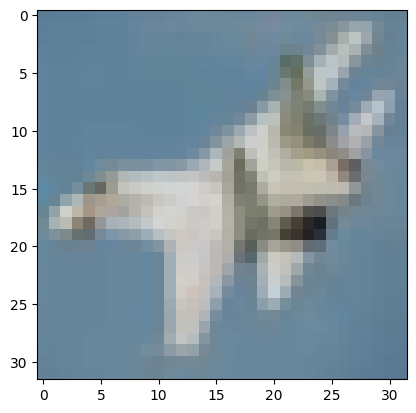

In [23]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
plt.imshow(X_test[10])
n = np.array(X_test[10])
p = n.reshape(1, 32, 32, 3)
predicted_label =  labels[model.predict(p).argmax()]
original_label = labels[y_test[10]]
print("Original label is {} and predicted label {}".format(original_label,predicted_label))
